# Econ 212: Problem Set 3

In [102]:
from fredapi import Fred
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import scipy.linalg as la

In [3]:
fred = Fred(api_key = 'f6fa4f544be19c2ea791e9a3240470bf')

## Problem 1: Seignorage and inflation

## Problem 2: SVAR impulse response to monetary shocks

### Part A

In [48]:
real_GDP = fred.get_series('GDPC1', observation_start = '1954-07-01', observation_end = '2022-10-01')
price_deflator = fred.get_series('GDPDEF', observation_start = '1954-07-01', observation_end = '2022-10-01')
fed_funds_rate = fred.get_series('FEDFUNDS', observation_end = '2022-10-01')

In [49]:
growth_rate = [400*np.log(real_GDP[t]/real_GDP[t-1]) for t in range(1,len(real_GDP))]
inflation_rate = [400*np.log(price_deflator[t]/price_deflator[t-1]) for t in range(1,len(price_deflator))]
fed_funds_rate = fed_funds_rate[::3][1:]

### Part B

### i

In [148]:
X = [(inflation_rate[t], growth_rate[t], fed_funds_rate[t]) for t in range(len(inflation_rate))]
sd_ff = np.std(fed_funds_rate)
shock = [0,0,1/sd_ff]
var_list = ['Inflation Rate', 'Growth Rate', 'Nominal Interest Rate']

In [152]:
def plot_var_irf(X, periods, shock, var_list):
    # fit model
    model = VAR(X).fit(1, trend = 'n')
    
    # get L matrix
    b_gamma_inv = model.coefs
    sigma = np.cov(np.matrix(model.resid).T)
    L = la.cholesky(sigma).T

    # compute IRF and scaled response function
    irf = [(b_gamma_inv ** t) @ L for t in  range(periods)]
    response = [irf[t] @ shock for t in range(periods)]
    
    # plot
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)

    for i in range(np.shape(X)[1]):
        irf_series = [response[t][0][i] for t in range(periods)]
        var = var_list[i]

        ax = plt.subplot(np.shape(X)[1], 1, i + 1)

        ax.plot(irf_series, linewidth=2.5)
        ax.set_title(f'{var} response to 100 bp monetary innovation')
        ax.set_ylabel('deviation from steady state')
        ax.set_xlabel('quarters')
    plt.show()

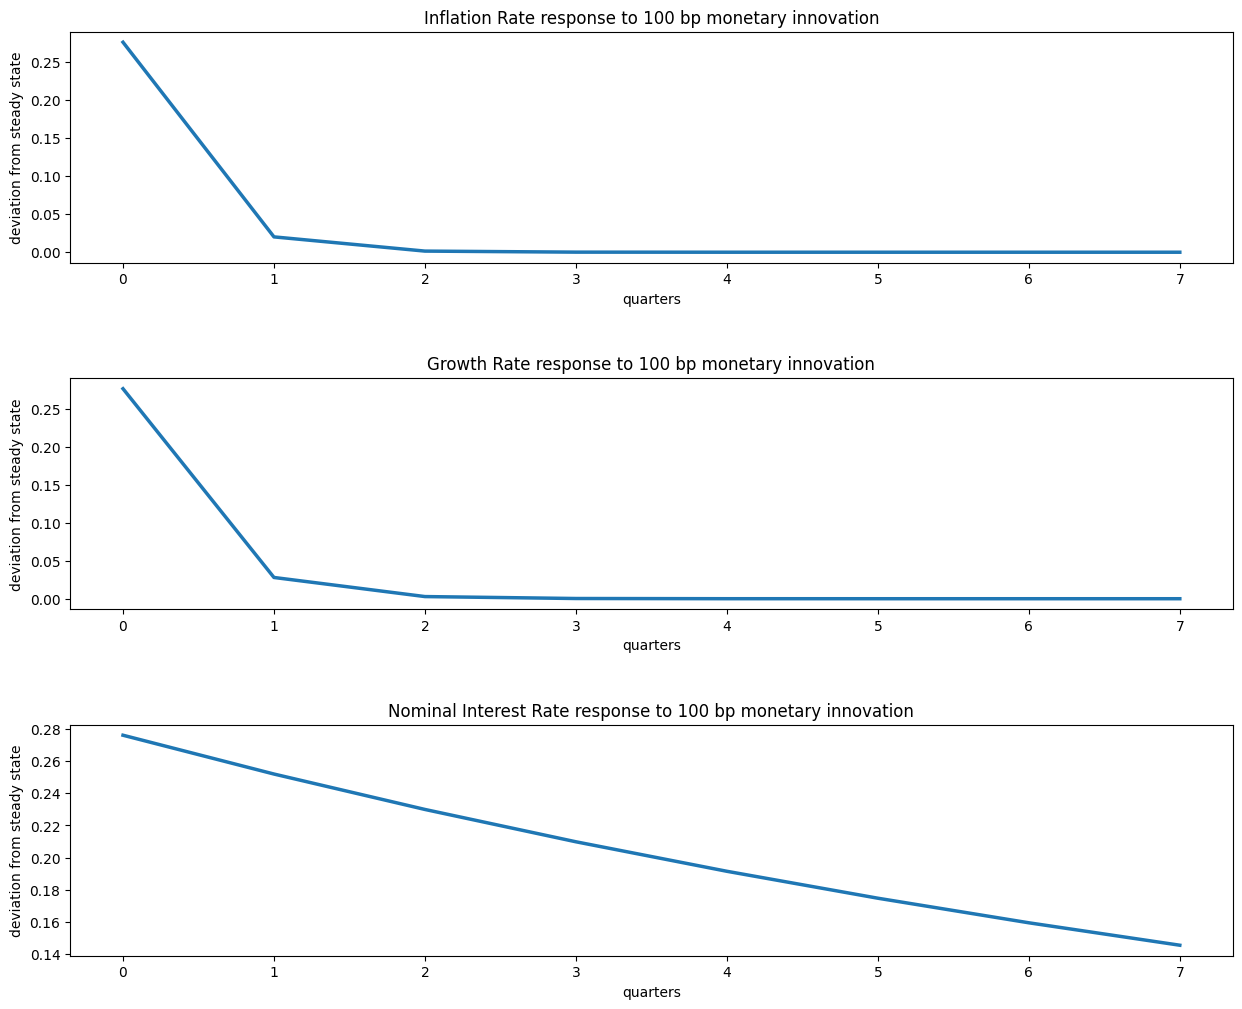

In [153]:
plot_var_irf(X, 8, shock, var_list)

### ii

In [ ]:
X_permuted = [(inflation_rate[t], growth_rate[t], fed_funds_rate[t]) for t in range(len(inflation_rate))]